In [1]:
import numpy
from matplotlib import pyplot
import os
import shadow_reconstruction

Lets set up a superposition of charges on opposite sides of a chain; we use the `DensityMatrix` class to hold the pure state.

In [3]:
L = 10

state = numpy.zeros((1<<L,), dtype=numpy.complex128)

state[0b0000000001] = 0.5
state[0b1000000000] = 0.5
state = shadow_reconstruction.DensityMatrix.new_pure_dense(state)

Consider the operator $a^\dagger_1 a_L$, calculate the true value of the expectation value:

In [5]:
operator = '+' + 'I'*(L-2) + '-'
state.expectation_string(operator)

(0.25+0j)

We now use the `Experiment` class to construct a shadow table with 10,000 entries.

In [16]:
experiment = shadow_reconstruction.Experiment(L)
measurements = experiment.sample(state, 10_000)

measurements.num_samples()

10000

The `Reconstruction` class takes these samples and estimates the operator expectation value.

In [17]:
recon = shadow_reconstruction.Reconstruction()
recon.estimate_string(operator, measurements)

(0.24816176470588247-0.005514705882352944j)

Lets map each of the samples to a scalar $Tr[\hat{\rho} O]$, and plot their distribution

In [42]:
shadows = recon.estimate_string_for_each_sample(operator, measurements, filtered=False)

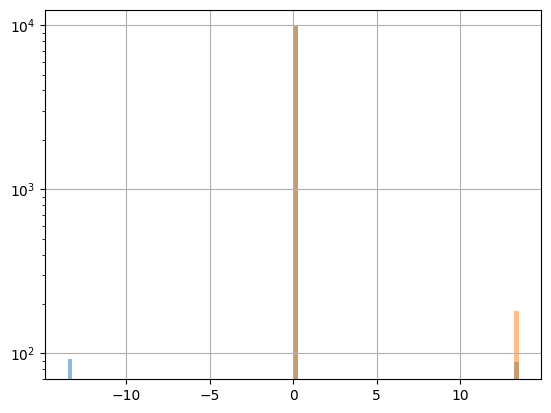

In [43]:
_, bins, _ = pyplot.hist(shadows.imag, bins=100, alpha=0.5)
pyplot.hist(shadows.real, bins=bins, alpha=0.5)
pyplot.grid()
pyplot.yscale('log')
pyplot.show()

Many of these are trivially zero, we can filter these out by only considering samples which match $a$ to $a^\dagger$, rescaling the remaining values by the expected fraction which contribute.

In [44]:
shadows = recon.estimate_string_for_each_sample(operator, measurements, filtered=True)

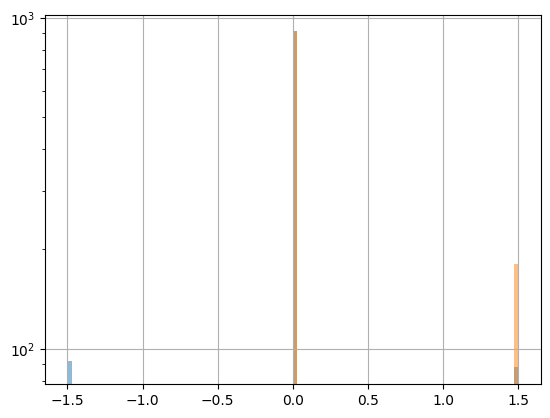

In [45]:
_, bins, _ = pyplot.hist(shadows.imag, bins=100, alpha=0.5)
pyplot.hist(shadows.real, bins=bins, alpha=0.5)
pyplot.grid()
pyplot.yscale('log')
pyplot.show()